In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [82]:
df = pd.read_csv('Data/Training/exploration_190pairs_300_20.csv')
# df['pnls'] = df['pnls']*100.0
df = df.sort_values('Date', ascending=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['pnls'])
print(df.shape)

(178030, 38)


In [83]:
df.columns

Index(['Date', 'Ticker_P1', 'Close_P1', 'Ticker_P2', 'Close_P2', 'High_P1',
       'High_P2', 'Low_P1', 'Low_P2', 'Volume_P1', 'Volume_P2', 'abs_spread',
       'same_sector_flag', 'same_sub_industry_flag', 'abs_spread_mean',
       'abs_spread_std', 'abs_spread_mean_l20', 'abs_spread_std_l20',
       'spread_normed', 'abs_spread_normed_max', 'abs_spread_normed_90th',
       'abs_spread_normed_75th', 'abs_spread_normed_median',
       'abs_spread_normed_l7_avg', 'abs_spread_normed_l14_avg', 'cos_sim',
       'corr_coef_l5', 'corr_coef_l10', 'corr_coef_l15', 'corr_coef_l20',
       'corr_coef_l40', 'corr_coef_l60', 'pnls', 'num_entries',
       'days_till_first_entry', 'both_legs_profited', 'SPY_return',
       'successful_pair_trading'],
      dtype='object')

In [84]:
df.isna().sum().sort_values(ascending=False).head(20)

days_till_first_entry        69091
abs_spread_normed_max        56620
abs_spread_normed_75th       56620
abs_spread_normed_median     56620
abs_spread_normed_90th       56620
abs_spread_normed_l14_avg     2280
abs_spread_normed_l7_avg       950
num_entries                      0
pnls                             0
corr_coef_l60                    0
corr_coef_l40                    0
Ticker_P1                        0
corr_coef_l15                    0
corr_coef_l10                    0
corr_coef_l5                     0
cos_sim                          0
both_legs_profited               0
SPY_return                       0
corr_coef_l20                    0
Date                             0
dtype: int64

In [85]:
# features_names = ['cos_sim', 'corr_coef_l5','corr_coef_l10', 'corr_coef_l15', 
#                    'corr_coef_l20', 'corr_coef_l40', 'corr_coef_l60',
#                   'same_sector_flag', 'same_sub_industry_flag',
#                    'abs_spread_normed_max', 'abs_spread_normed_90th',
#                    'abs_spread_normed_75th', 'abs_spread_normed_median',
#                    'abs_spread_normed_l7_avg', 'abs_spread_normed_l14_avg']

features_names = ['corr_coef_l5','corr_coef_l10', 'corr_coef_l15', 
                   'corr_coef_l20', 'corr_coef_l40', 'corr_coef_l60',
                  'same_sector_flag', 'same_sub_industry_flag']
# features_names = ['Date', 'Ticker_P1','Ticker_P2' ,'cos_sim', 'corr_coef', 'same_sector_flag', 'same_sub_industry_flag']
# features_names = ['corr_coef', 'same_sector_flag', 'same_sub_industry_flag']

# label = ['Date', 'Ticker_P1','Ticker_P2','recommended_trade','pnls']
label = ['both_legs_profited']
df.both_legs_profited = df.both_legs_profited=='True'

In [86]:
print(df.shape)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=features_names)
print(df.shape)

(178030, 38)
(178030, 38)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(df[features_names], df[label], test_size=0.2, shuffle=False)
scaler = StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [90]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# # Initialize and train the Logistic Regression model
# log_reg = LogisticRegression(max_iter=200, random_state=42)
# log_reg.fit(X_train, y_train)

# # Initialize RandomForest 
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
# Plot feature importances
importances = clf.feature_importances_
feature_imp_tb_tree = pd.DataFrame()
feature_imp_tb_tree['features'] = features_names
feature_imp_tb_tree['importances'] = importances

In [92]:
# # Plot feature importances
# importances = rf.feature_importances_
# feature_imp_tb_rf = pd.DataFrame()
# feature_imp_tb_rf['features'] = features_names
# feature_imp_tb_rf['importances'] = importances

# Plot feature importances
importances = xgb.feature_importances_
feature_imp_tb_xgb = pd.DataFrame()
feature_imp_tb_xgb['features'] = features_names
feature_imp_tb_xgb['importances'] = importances

In [93]:
# # Plot feature importances
# importances = log_reg.coef_[0]
# feature_imp_tb_lr = pd.DataFrame()
# feature_imp_tb_lr['features'] = features_names
# feature_imp_tb_lr['coef'] = importances

In [94]:
feature_imp_tb_tree

,features,importances
0,corr_coef_l5,0.159851
1,corr_coef_l10,0.164041
2,corr_coef_l15,0.160821
3,corr_coef_l20,0.166802
4,corr_coef_l40,0.168354
5,corr_coef_l60,0.178109
6,same_sector_flag,0.000885
7,same_sub_industry_flag,0.001137


In [95]:
feature_imp_tb_xgb

,features,importances
0,corr_coef_l5,0.077195
1,corr_coef_l10,0.083332
2,corr_coef_l15,0.080088
3,corr_coef_l20,0.089248
4,corr_coef_l40,0.086606
5,corr_coef_l60,0.089154
6,same_sector_flag,0.121716
7,same_sub_industry_flag,0.372661


In [96]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.75
              precision    recall  f1-score   support

       False       0.86      0.85      0.86     30610
        True       0.15      0.17      0.16      4996

    accuracy                           0.75     35606
   macro avg       0.51      0.51      0.51     35606
weighted avg       0.76      0.75      0.76     35606



In [101]:
# Predict the labels for the test set
y_pred = xgb.predict(X_test)
y_pred_proba = [x[1] for x in xgb.predict_proba(X_test)]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.86
              precision    recall  f1-score   support

       False       0.86      1.00      0.92     30610
        True       0.14      0.00      0.00      4996

    accuracy                           0.86     35606
   macro avg       0.50      0.50      0.46     35606
weighted avg       0.76      0.86      0.79     35606



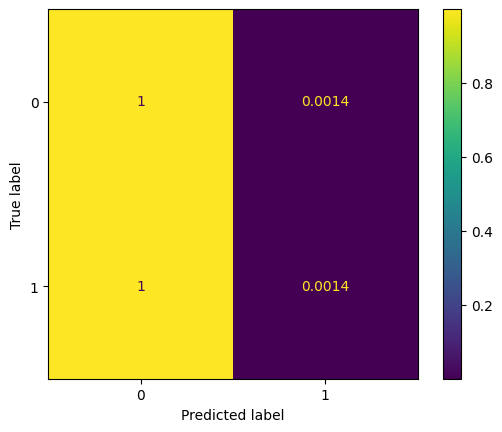

In [102]:
cm = confusion_matrix(y_test, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()